In [5]:
from accident_class import CARDao
import csv
import configparser as parser
props = parser.ConfigParser()  # Parser객체 생성
props.read("./config.ini")     # ini 파일 읽기
mysql_config = props['MYSQL']  # MYSQL Section "[MYSQL]"의 설정정보 조회

cars = CARDao(
    mysql_config['host'],
    3306, 
    mysql_config['user'],
    mysql_config['password'],
    mysql_config['db']
)

sido = []
sigungu = []
gungu_data = []
death_type = []
accident_data = []
gungu_arr = []

f = open('accident.csv', 'r', encoding="utf-8")
r = csv.reader(f)
next(r)
next(r)
for line in r:
    gungu = line[0]+" "+line[1]
    sigungu.append(gungu)
    death_type.append(line[2])
    accident_data.append(line)
f.close()

sigungu = list(filter(None,set(sigungu)))

for i in sigungu :
    if i.find(" ") != -1 :
        sidogun_arr = i.split(' ')
        gungu_arr.append(sidogun_arr)
        # 시 데이터 list화
        sido.append(sidogun_arr[0])

# 중복 제거 후 시 데이터 insert
si_data = list(filter(None,set(sido)))
cars.insert_sido(si_data)

for i in gungu_arr :
    # 군구 데이터 list화
    gungu_data.append([int(cars.select_si(i[0])[0]), i[1]])

# 중복 제거 후 시군구 데이터 insert
gungu_data = list(set([tuple(gg) for gg in gungu_data]))
for i in gungu_data :
    cars.insert_sigungu(i)

# 사고 타입
death_type = list(filter(None,set(death_type)))
cars.insert_death_type(death_type)
#함수

# 데이터 입력
for data in accident_data :
    data[0] = cars.select_si(data[0])[0]
    data[1] = cars.select_sigungu(data[1])[0]
    data[2] = cars.select_death_type(data[2])[0]
    for i in range(3, 9) :
        if data[i] == '-' :
            data[i] = 0

cars.insert_accident_data(accident_data)

사고 수: 690


<Figure size 640x480 with 0 Axes>

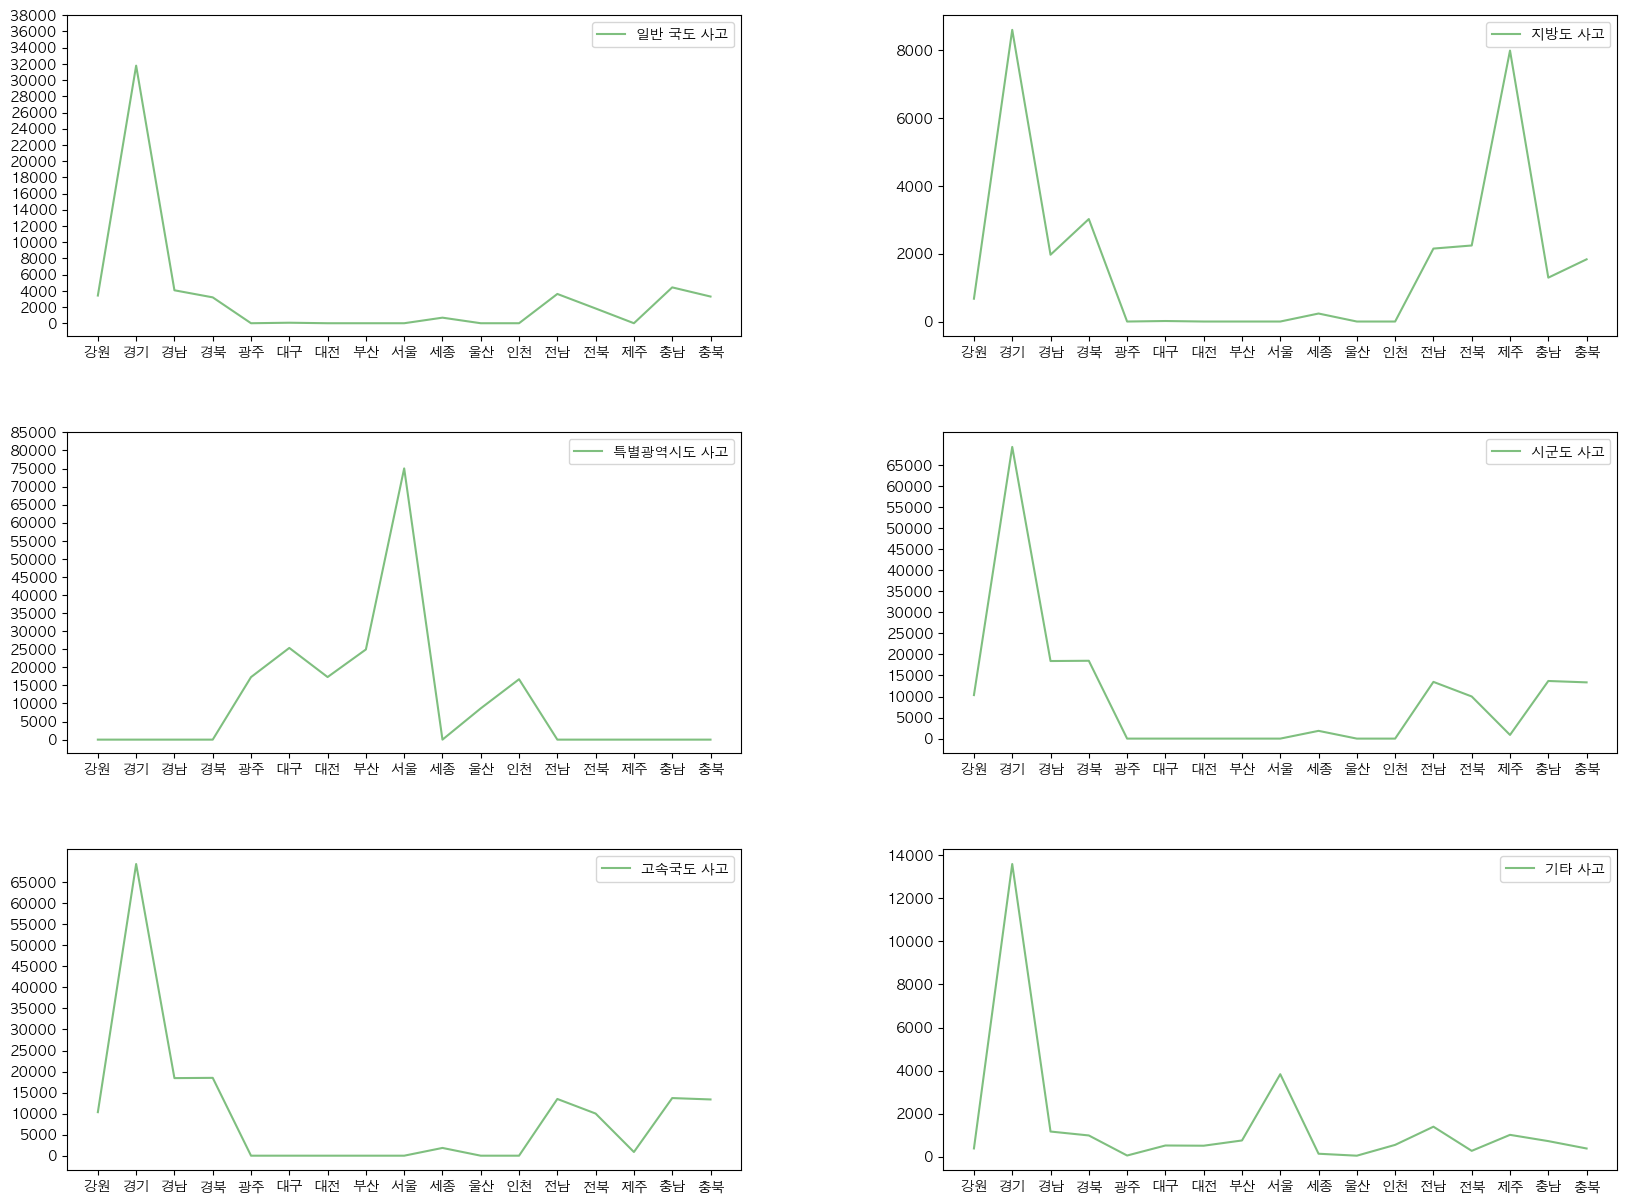

NameError: name 'matplotlib' is not defined

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

df = pd.read_csv("./accident__.csv", header=[1], thousands=',')

plt.figure()
rc('font', family='AppleGothic')

f, axes = plt.subplots(3, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

groups1 = df.groupby(['시도'])['일반국도'].sum()

axes[0, 0].plot(groups1, alpha = 0.5, color='green')
axes[0, 0].set_yticks(range(0, 40000, 2000))
axes[0, 0].legend(['일반 국도 사고'])

groups2 = df.groupby(['시도'])['지방도'].sum()

axes[0, 1].plot(groups2, alpha = 0.5, color='green')
axes[0, 1].set_yticks(range(0, 10000, 2000))
axes[0, 1].legend(['지방도 사고'])

groups3 = df.groupby(['시도'])['특별광역시도'].sum()

axes[1, 0].plot(groups3, alpha = 0.5, color='green')
axes[1, 0].set_yticks(range(0, 90000, 5000))
axes[1, 0].legend(['특별광역시도 사고'])

groups4 = df.groupby(['시도'])['시군도'].sum()

axes[1, 1].plot(groups4, alpha = 0.5, color='green')
axes[1, 1].set_yticks(range(0, 70000, 5000))
axes[1, 1].legend(['시군도 사고'])

groups5 = df.groupby(['시도'])['시군도'].sum()

axes[2, 0].plot(groups5, alpha = 0.5, color='green')
axes[2, 0].set_yticks(range(0, 70000, 5000))
axes[2, 0].legend(['고속국도 사고'])

groups6 = df.groupby(['시도'])['기타'].sum()

axes[2, 1].plot(groups6, alpha = 0.5, color='green')
axes[2, 1].set_yticks(range(0, 15000, 2000))
axes[2, 1].legend(['기타 사고'])

plt.show()

matplotlib.__version__